<a href="https://colab.research.google.com/github/Yasuri-Wickramasinghe/ABM-Dengue/blob/main/Copy_of_dengue_Cases_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly dengu cases in 2018


##Import Libraries And Load Data Set

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
weekly = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Research ABM/2018-colombo weekly dengue cases .xlsx')

In [ ]:
#weekly.head(52)


## Weekly Dengue cases in 2018

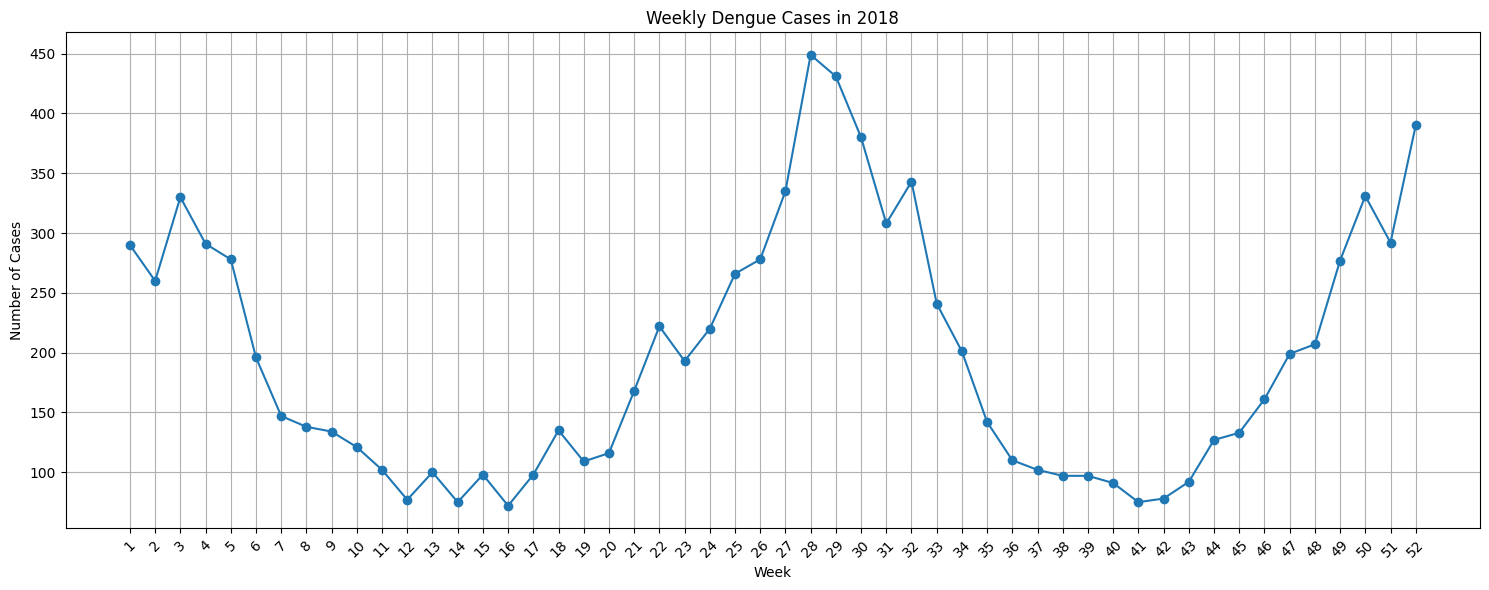

In [ ]:
# Filter out the 'cases' and 'week' columns
filtered_dengue = weekly[['week', 'Cases']]

# Plot the data
plt.figure(figsize=(15, 6))
plt.plot(filtered_dengue['week'], filtered_dengue['Cases'], marker='o')
plt.title('Weekly Dengue Cases in 2018')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.xticks(range(1, 53))  # Assuming 52 weeks in a year
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Rainfall And Temperature


Climate Data in 2018 as follows.

source: https://power.larc.nasa.gov/data-access-viewer/

In [ ]:
climate= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Research ABM/2018- average weekly climate data.xlsx')

In [ ]:
# Filter out the 'cases' and 'week' columns
filtered_climate = climate[['week', 'rf_avg','max_t_avg','min_t_avg']]

print(filtered_climate)



     week    rf_avg  max_t_avg  min_t_avg
0     1.0  0.177143  28.805714  22.304286
1     2.0  1.031429  28.242857  21.328571
2     3.0  0.770000  29.002857  21.554286
3     4.0  0.095714  29.162857  21.404286
4     5.0  3.078571  29.355714  22.788571
..    ...       ...        ...        ...
359   NaN       NaN        NaN        NaN
360   NaN       NaN        NaN        NaN
361   NaN       NaN        NaN        NaN
362   NaN       NaN        NaN        NaN
363   NaN       NaN        NaN        NaN

[364 rows x 4 columns]


##Compare Degue Cases and Rainfall

Compare degue cases and temperature

<ipython-input-9-9d2eb68176bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_climate_data[col] = (filtered_climate_data[col] - filtered_climate_data[col].min()) / (filtered_climate_data[col].max() - filtered_climate_data[col].min())


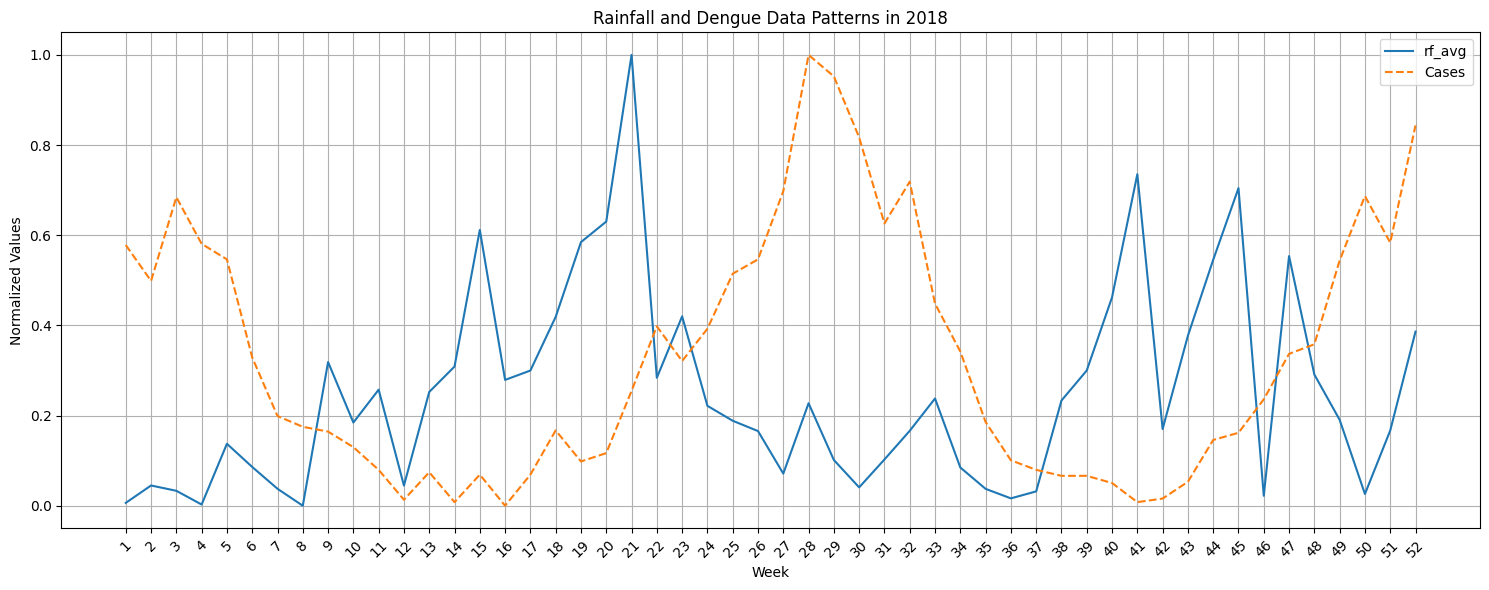

In [ ]:
rf_to_compare = ['rf_avg']  # You can include other columns if needed
dengue_columns_to_compare = ['Cases']   # Include any additional columns from the 'weekly' dataset

# Create new DataFrames containing only the selected columns
filtered_climate_data = climate[['week'] + rf_to_compare]  # Include 'week'
filtered_dengue_data = weekly[['week'] + dengue_columns_to_compare]     # Include 'week'

# Normalize the data for comparison by scaling to a common range
for col in rf_to_compare:
    filtered_climate_data[col] = (filtered_climate_data[col] - filtered_climate_data[col].min()) / (filtered_climate_data[col].max() - filtered_climate_data[col].min())

for col in dengue_columns_to_compare:
    filtered_dengue_data[col] = (filtered_dengue_data[col] - filtered_dengue_data[col].min()) / (filtered_dengue_data[col].max() - filtered_dengue_data[col].min())

# Plotting the data
plt.figure(figsize=(15,6))  # Set the figure size

# Plot the normalized climate data
for col in rf_to_compare:
    plt.plot(filtered_climate_data['week'], filtered_climate_data[col], label=col)

# Plot the normalized 'Dengue Cases' data
for col in dengue_columns_to_compare:
    plt.plot(filtered_dengue_data['week'], filtered_dengue_data[col], label=col, linestyle='--')

plt.xlabel('Week')
plt.ylabel('Normalized Values')
plt.title('Rainfall and Dengue Data Patterns in 2018')
plt.legend()  # Show legend
plt.xticks(range(1, 53))  # Assuming 52 weeks in a year
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


This plot dipicts on there is a relationship between rainfall and anual dengue cases. Both are distributed periodically.

##Pearson's Cross-Correlation of Dengue Cases with Rainfall in 2018


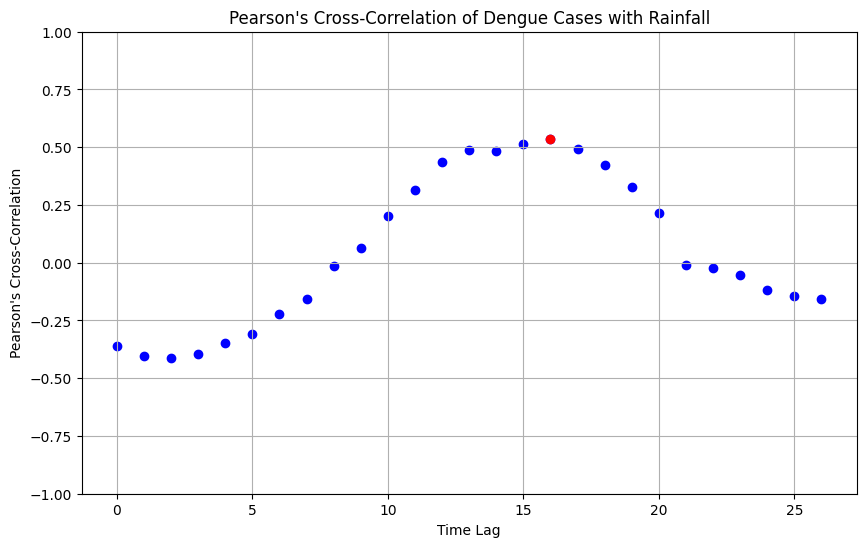

In [ ]:

dengue_cases = weekly['Cases']
rainfall = climate['rf_avg']

# Calculate cross-correlation for various lags
max_lag = len(dengue_cases) // 2  # Maximum lag to consider
cross_correlations = []

for lag in range(0, max_lag + 1):
    dengue_shifted = dengue_cases.shift(lag, fill_value=0)  # Shift dengue cases data
    cross_correlation = dengue_shifted.corr(rainfall)       # Calculate correlation for shifted data
    cross_correlations.append(cross_correlation)

# Find the index of the highest correlation
highest_correlation_index = np.argmax(cross_correlations)

# Plotting Pearson's cross-correlation
plt.figure(figsize=(10, 6))
plt.scatter(range(0, max_lag + 1), cross_correlations, marker='o', color='blue')
plt.scatter(highest_correlation_index, cross_correlations[highest_correlation_index], marker='o', color='red')
plt.xlabel('Time Lag')
plt.ylim(-1, 1)
plt.ylabel("Pearson's Cross-Correlation")
plt.title("Pearson's Cross-Correlation of Dengue Cases with Rainfall")
plt.grid()
plt.show()


Calculating the highest correlation as the above plot and we can conclude that after sixteen weeks rainfall, which affects the dengue cases.


##Compare Dengue Cases And Maximum Temperature

<ipython-input-12-85f7ffd2d837>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_climate_data[col] = (filtered_climate_data[col] - filtered_climate_data[col].min()) / (filtered_climate_data[col].max() - filtered_climate_data[col].min())


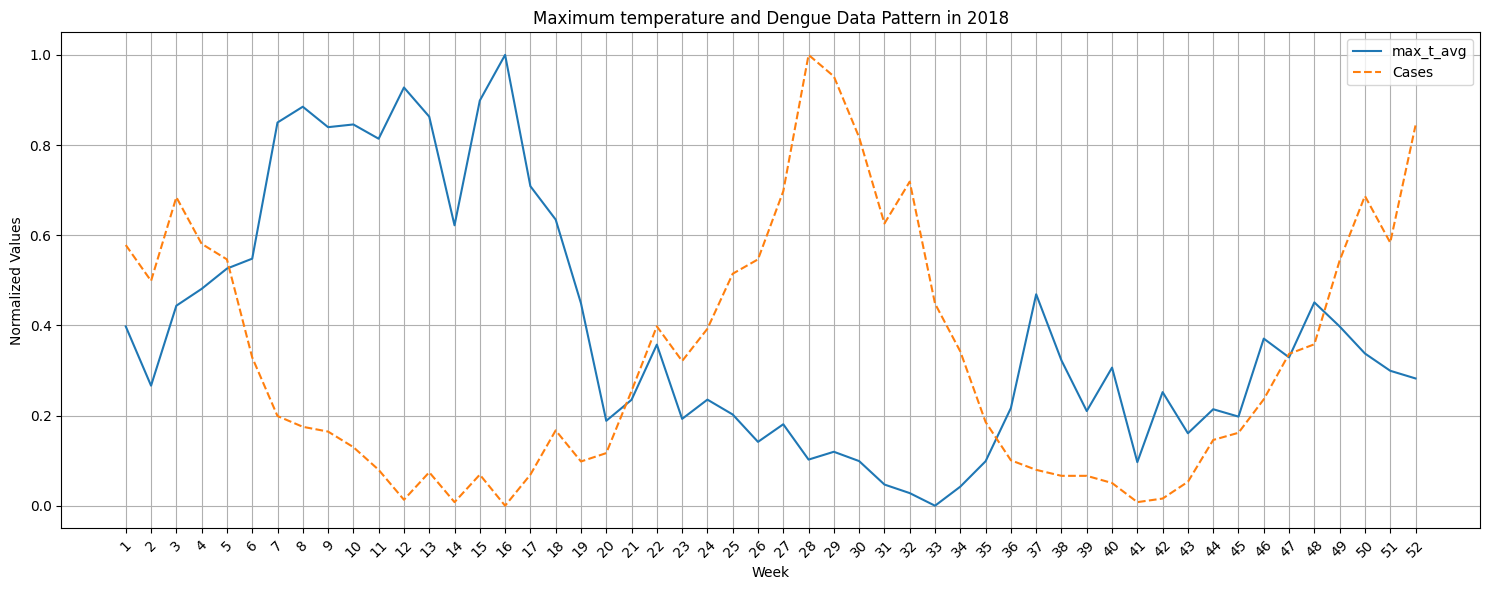

In [ ]:
max_t_to_compare = ['max_t_avg']  # You can include other columns if needed
dengue_columns_to_compare = ['Cases']   # Include any additional columns from the 'weekly' dataset

# Create new DataFrames containing only the selected columns
filtered_climate_data = climate[['week'] + max_t_to_compare]  # Include 'week'
filtered_dengue_data = weekly[['week'] + dengue_columns_to_compare]     # Include 'week'

# Normalize the data for comparison by scaling to a common range
for col in max_t_to_compare:
    filtered_climate_data[col] = (filtered_climate_data[col] - filtered_climate_data[col].min()) / (filtered_climate_data[col].max() - filtered_climate_data[col].min())

for col in dengue_columns_to_compare:
    filtered_dengue_data[col] = (filtered_dengue_data[col] - filtered_dengue_data[col].min()) / (filtered_dengue_data[col].max() - filtered_dengue_data[col].min())

# Plotting the data
plt.figure(figsize=(15,6))  # Set the figure size

# Plot the normalized climate data
for col in max_t_to_compare:
    plt.plot(filtered_climate_data['week'], filtered_climate_data[col], label=col)

# Plot the normalized 'Dengue Cases' data
for col in dengue_columns_to_compare:
    plt.plot(filtered_dengue_data['week'], filtered_dengue_data[col], label=col, linestyle='--')

plt.xlabel('Week')
plt.ylabel('Normalized Values')
plt.title('Maximum temperature and Dengue Data Pattern in 2018')
plt.legend()  # Show legend
plt.xticks(range(1, 53))  # Assuming 52 weeks in a year
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


This plot dipicts on there is a relationship between maximum temperature and anual dengue cases. Both are distributed periodically.

##Pearson's Cross-Correlation of Dengue Cases with Maximum temperature in 2018


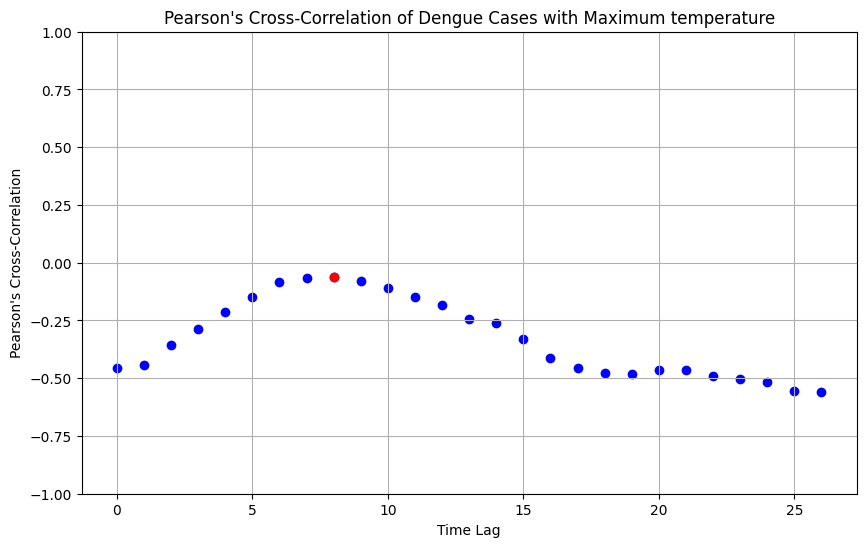

In [ ]:
dengue_cases = weekly['Cases']
maximam_t = climate['max_t_avg']

# Calculate cross-correlation for various lags
max_lag = len(dengue_cases) // 2  # Maximum lag to consider
cross_correlations = []

for lag in range(0, max_lag + 1):
    dengue_shifted = dengue_cases.shift(lag, fill_value=0)  # Shift dengue cases data
    cross_correlation = dengue_shifted.corr(maximam_t)       # Calculate correlation for shifted data
    cross_correlations.append(cross_correlation)

# Find the index of the highest correlation
highest_correlation_index = np.argmax(cross_correlations)

# Plotting Pearson's cross-correlation
plt.figure(figsize=(10, 6))
plt.scatter(range(0, max_lag + 1), cross_correlations, marker='o', color='blue')
plt.scatter(highest_correlation_index, cross_correlations[highest_correlation_index], marker='o', color='red')
plt.xlabel('Time Lag')
plt.ylim(-1, 1)
plt.ylabel("Pearson's Cross-Correlation")
plt.title("Pearson's Cross-Correlation of Dengue Cases with Maximum temperature")
plt.grid()
plt.show()


Calculating the highest correlation as the above plot and we can conclude that, eight weeks after recorded highest temperature, temperature affects for increasing the No. of Dengue incidents.

##Compare minimun temperature and dengue cases

<ipython-input-15-2b1ba342fe0c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_climate_data[col] = (filtered_climate_data[col] - filtered_climate_data[col].min()) / (filtered_climate_data[col].max() - filtered_climate_data[col].min())


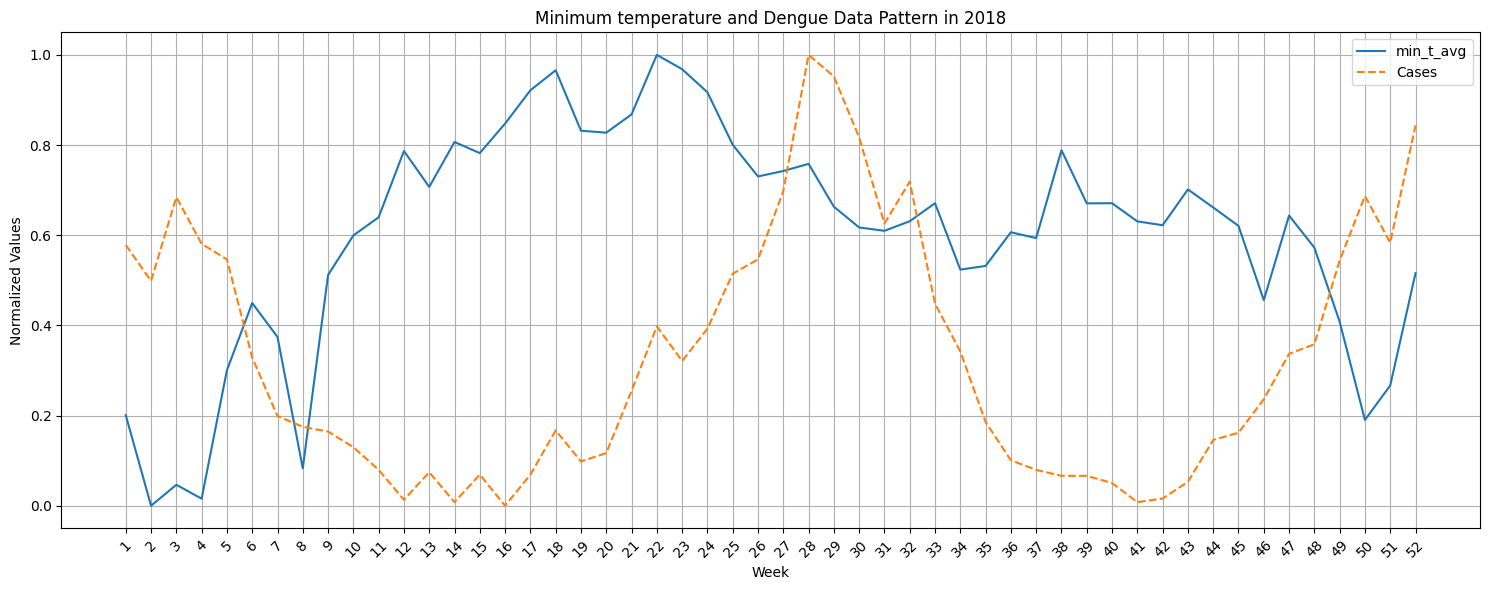

In [ ]:
min_t_to_compare = ['min_t_avg']  # You can include other columns if needed
dengue_columns_to_compare = ['Cases']   # Include any additional columns from the 'weekly' dataset

# Create new DataFrames containing only the selected columns
filtered_climate_data = climate[['week'] + min_t_to_compare]  # Include 'week'
filtered_dengue_data = weekly[['week'] + dengue_columns_to_compare]     # Include 'week'

# Normalize the data for comparison by scaling to a common range
for col in min_t_to_compare:
    filtered_climate_data[col] = (filtered_climate_data[col] - filtered_climate_data[col].min()) / (filtered_climate_data[col].max() - filtered_climate_data[col].min())

for col in dengue_columns_to_compare:
    filtered_dengue_data[col] = (filtered_dengue_data[col] - filtered_dengue_data[col].min()) / (filtered_dengue_data[col].max() - filtered_dengue_data[col].min())

# Plotting the data
plt.figure(figsize=(15,6))  # Set the figure size

# Plot the normalized climate data
for col in min_t_to_compare:
    plt.plot(filtered_climate_data['week'], filtered_climate_data[col], label=col)

# Plot the normalized 'Dengue Cases' data
for col in dengue_columns_to_compare:
    plt.plot(filtered_dengue_data['week'], filtered_dengue_data[col], label=col, linestyle='--')

plt.xlabel('Week')
plt.ylabel('Normalized Values')
plt.title('Minimum temperature and Dengue Data Pattern in 2018')
plt.legend()  # Show legend
plt.xticks(range(1, 53))  # Assuming 52 weeks in a year
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


This plot dipicts on there is a relationship between minimum temperature and anual dengue cases. Both are distributed periodically.

##Pearson's Cross-Correlation of Dengue Cases with Miniimum temperature in 2018

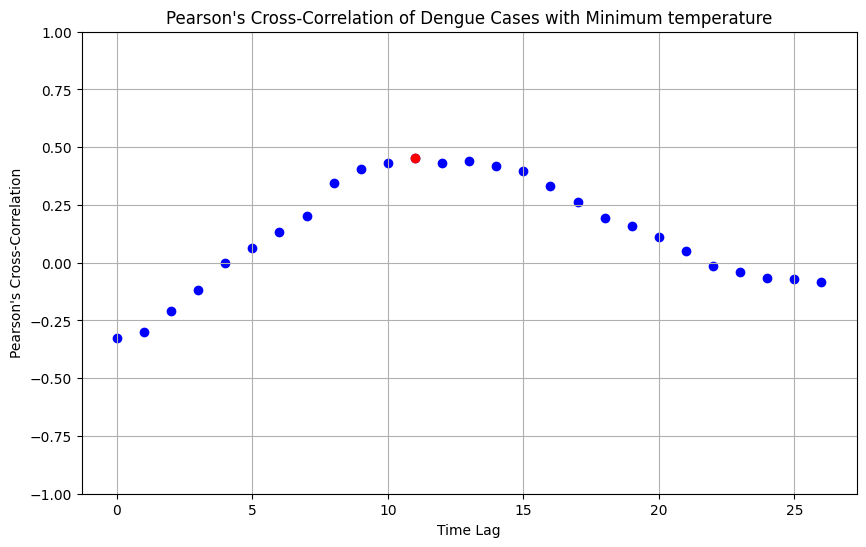

In [ ]:
dengue_cases = weekly['Cases']
minimum_t = climate['min_t_avg']

# Calculate cross-correlation for various lags
max_lag = len(dengue_cases) // 2  # Maximum lag to consider
cross_correlations = []

for lag in range(0, max_lag + 1):
    dengue_shifted = dengue_cases.shift(lag, fill_value=0)  # Shift dengue cases data
    cross_correlation = dengue_shifted.corr(minimum_t)       # Calculate correlation for shifted data
    cross_correlations.append(cross_correlation)

# Find the index of the highest correlation
highest_correlation_index = np.argmax(cross_correlations)

# Plotting Pearson's cross-correlation
plt.figure(figsize=(10, 6))
plt.scatter(range(0, max_lag + 1), cross_correlations, marker='o', color='blue')
plt.scatter(highest_correlation_index, cross_correlations[highest_correlation_index], marker='o', color='red')
plt.xlabel('Time Lag')
plt.ylim(-1, 1)
plt.ylabel("Pearson's Cross-Correlation")
plt.title("Pearson's Cross-Correlation of Dengue Cases with Minimum temperature")
plt.grid()
plt.show()


Calculating the highest correlation as the above plot and we can conclude that, eleven weeks after recorded low temperature, temperature affects for increasing the No. of Dengue incidents.